In [62]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D
import pandas as pd
import os
import random
from tensorflow import keras
from PIL import Image
from sklearn.metrics import classification_report

In [2]:
data_dir = 'data/Bald' 

In [3]:
# Visualization of Bald images
paths=[]
files=[]
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        paths+=[os.path.join(dirname, filename)]
        files+=[filename]
print(paths[0:3])
print(len(paths))

['data/Bald/eu.738dbc29-5bab-483c-b049-0c3c2af98ead.jpg', 'data/Bald/eu.43b1f497-0c6e-4b66-9a04-3f2c46c643c3.jpg', 'data/Bald/eu.ce122d94-ebfa-44de-952f-e25f024f45e3.jpg']
42


In [4]:
# Set grade of baldness manually
s='skin head'
t='thin hair'

grades=[
        t, s, t, t, t, s, 
        s, t, t, s, s, t, 
        t, s, t, s, t, t,
        t, s, s, s, t, t,
        s, t, t, s, t, s,
        s, t, t, s, s, t,
        t, t, t, s, t, s,
]

In [5]:
normal_mapping={s:1,t:0}
reverse_mapping={1:s,0:t}

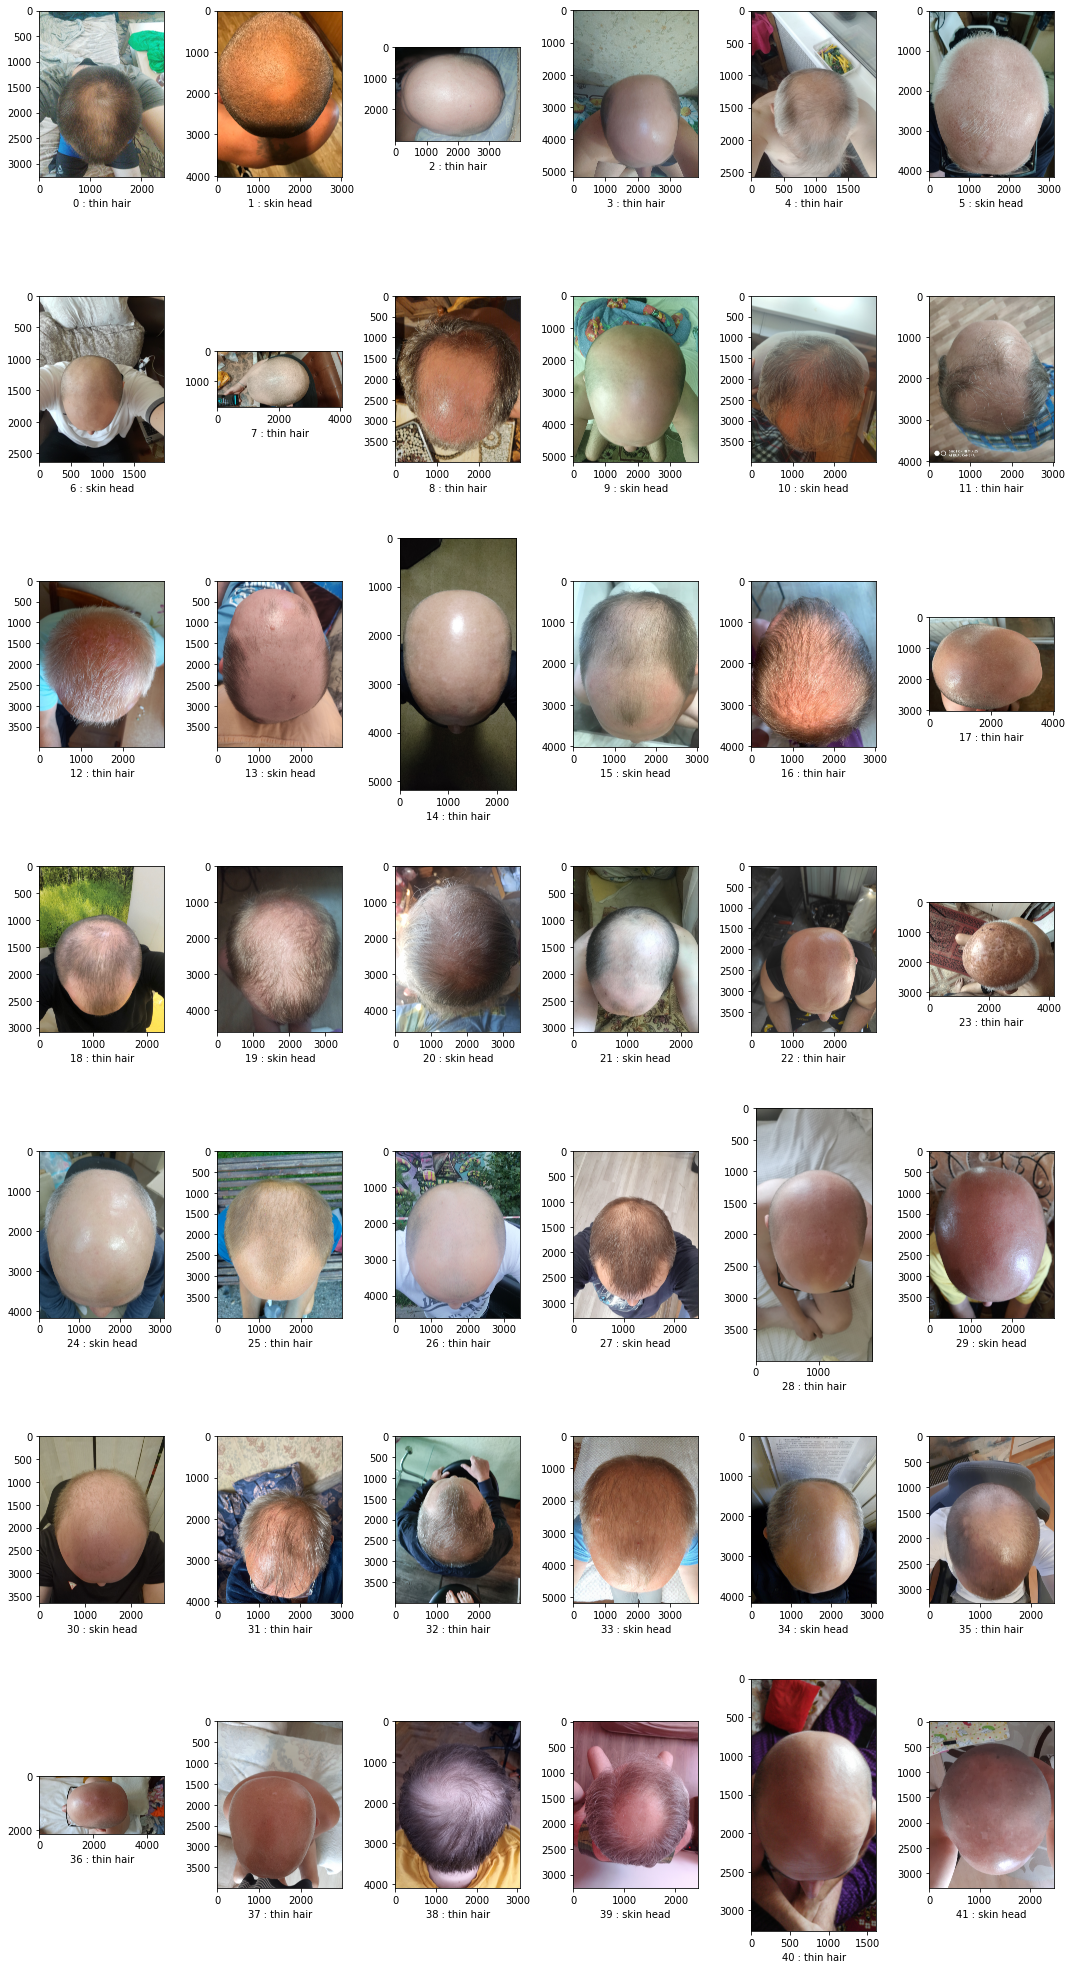

In [6]:
plt.subplots(7,6, figsize=(15,28))
for i,path in enumerate(paths):
    im = Image.open(path)
    arr = np.array(im)
    plt.subplot(7,6, i+1)
    plt.xlabel(str(i)+' : '+grades[i])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.show()

In [7]:
data=pd.DataFrame(columns=['file','grade'],index=list(range(len(paths))))
data['file']=files
data['grade']=grades
display(data)
data['grade']=data['grade'].map(normal_mapping)

,file,grade
0,eu.738dbc29-5bab-483c-b049-0c3c2af98ead.jpg,thin hair
1,eu.43b1f497-0c6e-4b66-9a04-3f2c46c643c3.jpg,skin head
2,eu.ce122d94-ebfa-44de-952f-e25f024f45e3.jpg,thin hair
3,eu.5381a6d5-e0f5-46bc-a6fc-3c971b46c287.jpg,thin hair
4,eu.f6abef78-e03d-43d3-a4b9-64594ac83496.jpg,thin hair
5,eu.fd8a0281-72d0-4c31-866a-1b41e03c244e.jpg,skin head
6,eu.4111e8fc-67a3-45d3-b58c-85d26d505902.jpg,skin head
7,eu.1318656b-9b75-4e65-89e7-154aa2916ead.jpg,thin hair
8,eu.a2fae165-ba27-4d37-8832-54cf4ce16a64.jpg,thin hair
9,eu.f7beccef-60d5-4f3a-b913-eaea5d40f466.jpg,skin head


In [8]:
class_names=[s,t]
print(class_names)
num_class = len(class_names)
print(num_class)

['skin head', 'thin hair']
2


In [9]:
image_files = []
image_labels=[]
for i in range(len(data)):
    filename=data.iloc[i,0]
    label=data.iloc[i,1]
    image_files+=[os.path.join(data_dir, filename)] 
    image_labels+=[label]

In [10]:
print(image_files[0:3])

['data/Bald/eu.738dbc29-5bab-483c-b049-0c3c2af98ead.jpg', 'data/Bald/eu.43b1f497-0c6e-4b66-9a04-3f2c46c643c3.jpg', 'data/Bald/eu.ce122d94-ebfa-44de-952f-e25f024f45e3.jpg']


In [11]:
image_file_list = image_files
image_label_list = image_labels
num_total = len(image_labels)

In [12]:
image_width, image_height = Image.open(image_file_list[0]).size

print('Total image count:', num_total)
print("Image dimensions:", image_width, "x", image_height)
print("Label names:", class_names)
print("Label counts:", [len(image_files[i]) for i in range(num_class)])

Total image count: 42
Image dimensions: 2448 x 3264
Label names: ['skin head', 'thin hair']
Label counts: [53, 53]


In [13]:
valid_frac = 0.2
test_frac = 0.2
trainX,trainY = [],[]
valX,valY = [],[]
testX,testY = [],[]

for i in range(num_total):
    rann = np.random.random()
    if rann < valid_frac:
        valX.append(image_file_list[i])
        valY.append(image_label_list[i])
    elif rann < valid_frac+test_frac:
        testX.append(image_file_list[i])
        testY.append(image_label_list[i])    
    else:
        trainX.append(image_file_list[i])
        trainY.append(image_label_list[i])

In [14]:
trainX=np.array(trainX)
trainY=np.array(trainY)
valX=np.array(valX)
valY=np.array(valY)
testX=np.array(testX)
testY=np.array(testY)

In [15]:
tnum_total = len(testX)

In [16]:
print('Training images count:', len(trainX))
print('Validation images count:', len(valY))
print('Testing images count:', len(testY))

Training images count: 29
Validation images count: 8
Testing images count: 5


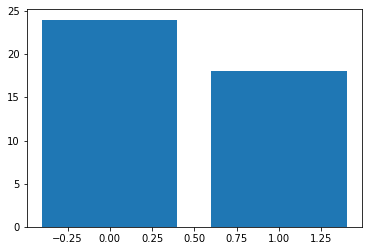

In [17]:
value_count_df = pd.DataFrame(pd.Series(np.concatenate([trainY, valY, testY])).value_counts()).rename_axis('unique_values').reset_index()
value_count_df.columns = ['Class', 'Count']
plt.bar(value_count_df['Class'],value_count_df['Count'])
plt.show()

In [33]:
from monai.apps import download_and_extract
from monai.config import print_config
from monai.metrics import ROCAUCMetric
from monai.networks.nets import DenseNet121
from monai.transforms import *
from monai.data import Dataset, DataLoader
from monai.utils import set_determinism

class SumDimension(Transform):
    def __init__(self, dim=1):
        self.dim = dim
    def __call__(self, inputs):
        return inputs.sum(self.dim)

In [34]:
class MyResize(Transform):
    def __init__(self, size=(400,400)):
        self.size = size
    def __call__(self, inputs):
        image=cv2.resize(np.array(inputs),dsize=(self.size[1],self.size[0]),interpolation=cv2.INTER_CUBIC)
        image2=image[100:300,100:300]
        return image2

In [35]:
train_transforms = Compose([
    LoadImage(image_only=True),
    Resize((-1,1)),
    SumDimension(2),
    MyResize(),
    AddChannel(),    
    ToTensor(),
])

val_transforms = Compose([
    LoadImage(image_only=True),
    Resize((-1,1)),
    SumDimension(2),
    MyResize(),
    AddChannel(),    
    ToTensor(),
])

act = Activations(softmax=True)
to_onehot = AsDiscrete(to_onehot=num_class)# n_classes=num_class

/home/inlab/.local/lib/python3.8/site-packages/monai/utils/deprecate_utils.py:107: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
  warn_deprecated(obj, msg, warning_category)


In [36]:
class MedNISTDataset(Dataset):

    def __init__(self, image_files, labels, transforms):
        self.image_files = image_files
        self.labels = labels
        self.transforms = transforms

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, index):
        return self.transforms(self.image_files[index]), self.labels[index]

In [91]:
train_ds = MedNISTDataset(trainX, trainY, train_transforms)
train_loader = DataLoader(train_ds, batch_size=2, shuffle=True, num_workers=2)

val_ds = MedNISTDataset(valX, valY, val_transforms)
val_loader = DataLoader(val_ds, batch_size=2, num_workers=2)

test_ds = MedNISTDataset(testX, testY, val_transforms)
test_loader = DataLoader(test_ds, batch_size=2, num_workers=2)

In [92]:
import torch
import cv2

device = torch.device("cuda:0")   #"cuda:0"
model = DenseNet121(
    spatial_dims=2,            
    in_channels=1,
    out_channels=num_class,
).to(device)

loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 1e-5)
epoch_num = 15
val_interval = 1

In [93]:
import gc
import torch

gc.collect()
torch.cuda.empty_cache()

In [94]:
best_metric = -1
best_metric_epoch = -1
epoch_loss_values = list()
auc_metric = ROCAUCMetric()
metric_values = list()

for epoch in range(epoch_num):
    print('-' * 10)
    print(f"epoch {epoch + 1}/{epoch_num}")
    model.train()
    epoch_loss = 0
    step = 0

    for batch_data in train_loader:
        step += 1
        inputs, labels = batch_data[0].to(device), batch_data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs.float())         ##### .float()
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        print(f"{step}/{len(train_ds) // train_loader.batch_size}, train_loss: {loss.item():.4f}")
        epoch_len = len(train_ds) // train_loader.batch_size

    epoch_loss /= step
    epoch_loss_values.append(epoch_loss)
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    if (epoch + 1) % val_interval == 0:
        model.eval()
        with torch.no_grad():
            y_pred = torch.tensor([], dtype=torch.float32, device=device)
            y = torch.tensor([], dtype=torch.long, device=device)
            for val_data in val_loader:
                val_images, val_labels = val_data[0].to(device), val_data[1].to(device)
                y_pred = torch.cat([y_pred, model(val_images)], dim=0)
                y = torch.cat([y, val_labels], dim=0)
            y_onehot = [to_onehot(i) for i in y]
            y_pred_act = [act(i) for i in y_pred]
            auc_metric(y_pred_act, y_onehot)
            auc_result = auc_metric.aggregate()
            auc_metric.reset()
            del y_pred_act, y_onehot
            metric_values.append(auc_result)
            acc_value = torch.eq(y_pred.argmax(dim=1), y)
            acc_metric = acc_value.sum().item() / len(acc_value)
            
            if acc_metric > best_metric:
                best_metric = acc_metric
                best_metric_epoch = epoch + 1
                torch.save(model.state_dict(), 'best_metric_model.pth')
                print('saved new best metric model')
                
            print(f"current epoch: {epoch + 1} current AUC: {auc_result:.4f}"
                  f" current accuracy: {acc_metric:.4f} best AUC: {best_metric:.4f}"
                  f" at epoch: {best_metric_epoch}")
            
print(f"train completed, best_metric: {best_metric:.4f} at epoch: {best_metric_epoch}")

----------
epoch 1/15
1/14, train_loss: 0.6324
2/14, train_loss: 0.7465
3/14, train_loss: 0.9596
4/14, train_loss: 0.9531
5/14, train_loss: 0.4961
6/14, train_loss: 0.6864
7/14, train_loss: 0.7468
8/14, train_loss: 0.6721
9/14, train_loss: 0.7811
10/14, train_loss: 0.7958
11/14, train_loss: 0.9328
12/14, train_loss: 0.9612
13/14, train_loss: 0.7090
14/14, train_loss: 0.9345
15/14, train_loss: 0.5045
epoch 1 average loss: 0.7674
saved new best metric model
current epoch: 1 current AUC: 0.1667 current accuracy: 0.7500 best AUC: 0.7500 at epoch: 1
----------
epoch 2/15
1/14, train_loss: 0.9004
2/14, train_loss: 0.6976
3/14, train_loss: 0.9162
4/14, train_loss: 0.7238
5/14, train_loss: 0.5183
6/14, train_loss: 0.9063
7/14, train_loss: 0.5290
8/14, train_loss: 0.9025
9/14, train_loss: 0.6576
10/14, train_loss: 0.6925
11/14, train_loss: 0.8961
12/14, train_loss: 0.7073
13/14, train_loss: 0.7105
14/14, train_loss: 0.8806
15/14, train_loss: 0.5053
epoch 2 average loss: 0.7429
current epoch: 2 

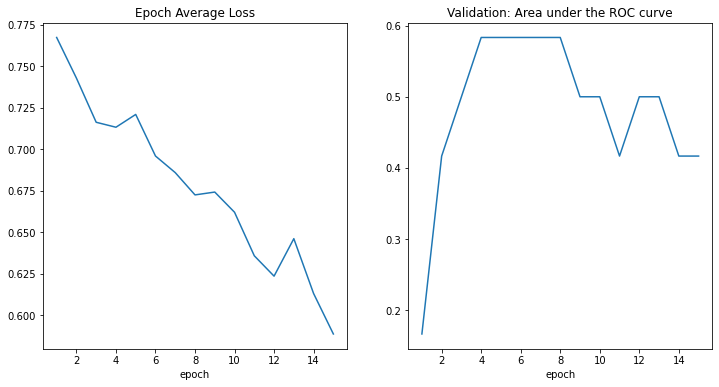

In [95]:
plt.figure('train', (12, 6))
plt.subplot(1, 2, 1)
plt.title("Epoch Average Loss")
x = [i + 1 for i in range(len(epoch_loss_values))]
y = epoch_loss_values
plt.xlabel('epoch')
plt.plot(x, y)
plt.subplot(1, 2, 2)
plt.title("Validation: Area under the ROC curve")
x = [val_interval * (i + 1) for i in range(len(metric_values))]
y = metric_values
plt.xlabel('epoch')
plt.plot(x, y)
plt.show()

In [109]:
#model.load_state_dict(torch.load('best_metric_model.pth'))
model.eval()
ty_true = list()
ty_pred = list()

with torch.no_grad():
    for test_data in test_loader:
        test_images, test_labels = test_data[0].to(device), test_data[1].to(device)
        pred = model(test_images).argmax(dim=1)
        #print(pred)
        for i in range(len(pred)):
            ty_true.append(test_labels[i].item())
            ty_pred.append(pred[i].item())
            #print( ty_pred.append(pred[i].item()))

In [110]:
print(classification_report(ty_true, ty_pred, target_names=class_names, digits=4))
print(classification_report(ty_true, ty_pred))
print(ty_pred)
print(ty_true)

              precision    recall  f1-score   support

   skin head     0.6667    0.5000    0.5714         4
   thin hair     0.0000    0.0000    0.0000         1

    accuracy                         0.4000         5
   macro avg     0.3333    0.2500    0.2857         5
weighted avg     0.5333    0.4000    0.4571         5

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.33      0.25      0.29         5
weighted avg       0.53      0.40      0.46         5

[0, 0, 1, 0, 1]
[1, 0, 0, 0, 0]


In [98]:
predict = model(test_images).argmax(dim=1)
print(predict)

tensor([1], device='cuda:0')
